![Allstate Claims Severity](allstate_banner-660x120.png)

When you’ve been devastated by a serious car accident, your focus is on the things that matter the most: family, friends, and other loved ones. Pushing paper with your insurance agent is the last place you want your time or mental energy spent. This is why Allstate, a personal insurer in the United States, is continually seeking fresh ideas to improve their claims service for the over 16 million households they protect.

Allstate is currently developing automated methods of predicting the cost, and hence severity, of claims. In this recruitment challenge, Kagglers are invited to show off their creativity and flex their technical chops by creating an algorithm which accurately predicts claims severity. Aspiring competitors will demonstrate insight into better ways to predict claims severity for the chance to be part of Allstate’s efforts to ensure a worry-free customer experience.

Each row in this dataset represents an insurance claim. You must predict the value for the 'loss' column. Variables prefaced with 'cat' are categorical, while those prefaced with 'cont' are continuous.

# **<span style="color:orange;">Import Libraries</span>**

In [104]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
from wordcloud import WordCloud
import statsmodels.api as sm
from scipy.stats import iqr
pd.set_option('display.max_columns', None)

# **<span style="color:orange;">Reading Data</span>**

In [105]:
def get_data():
    BASE_DIR = Path.cwd().parents[0]
    file_name = 'claims-severity-anonymized-raw.csv'
    return pd.read_csv(BASE_DIR / 'data' / 'allstate-claims-severity' / file_name, on_bad_lines="skip")

In [106]:
# Reading data from source
df = get_data()

In [107]:
# Preview of data
df.head(5)

id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10 cat11 cat12 cat13  \
0   1.0    A    B    A    B    A    A    A    A    B     A     B     A     A   
1   2.0    A    B    A    A    A    A    A    A    B     B     A     A     A   
2   5.0    A    B    A    A    B    A    A    A    B     B     B     B     B   
3  10.0    B    B    A    B    A    A    A    A    B     A     A     A     A   
4  11.0    A    B    A    B    A    A    A    A    B     B     A     B     A   

  cat14 cat15 cat16 cat17 cat18 cat19 cat20 cat21 cat22 cat23 cat24 cat25  \
0     A     A     A     A     A     A     A     A     A     B     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     A     A     A     A     A     A     A     A     A     A     A     A   
3     A     A     A     A     A     A     A     A     A     B     A     A   
4     A     A     A     A     A     A     A     A     A     B     A     A   

  cat26 cat27 cat28 cat29 cat30 cat31 cat32 cat33 cat34 cat35 cat36 cat37  \
0     A     A     A     A     A     A     A     A     A     A     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     A     A     A     A     A     A     A     A     A     A     B     A   
3     A     A     A     A     A     A     A     A     A     A     A     A   
4     A     A     A     A     A     A     A     A     A     A     A     A   

  cat38 cat39 cat40 cat41 cat42 cat43 cat44 cat45 cat46 cat47 cat48 cat49  \
0     A     A     A     A     A     A     A     A     A     A     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     A     A     A     A     A     A     A     A     A     A     A     A   
3     A     A     A     A     A     A     A     A     A     A     A     A   
4     A     A     A     A     A     A     A     A     A     A     A     A   

  cat50 cat51 cat52 cat53 cat54 cat55 cat56 cat57 cat58 cat59 cat60 cat61  \
0     A     A     A     A     A     A     A     A     A     A     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     A     A     A     A     A     A     A     A     A     A     A     A   
3     A     A     A     A     A     A     A     A     A     A     A     A   
4     A     A     A     A     A     A     A     A     A     A     A     A   

  cat62 cat63 cat64 cat65 cat66 cat67 cat68 cat69 cat70 cat71 cat72 cat73  \
0     A     A     A     A     A     A     A     A     A     A     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     A     A     A     A     A     A     A     A     A     A     A     A   
3     A     A     A     A     A     A     A     A     A     A     A     B   
4     A     A     A     A     A     A     A     A     A     A     B     A   

  cat74 cat75 cat76 cat77 cat78 cat79 cat80 cat81 cat82 cat83 cat84 cat85  \
0     A     B     A     D     B     B     D     D     B     D     C     B   
1     A     A     A     D     B     B     D     D     A     B     C     B   
2     A     A     A     D     B     B     B     D     B     D     C     B   
3     A     A     A     D     B     B     D     D     D     B     C     B   
4     A     A     A     D     B     D     B     D     B     B     C     B   

  cat86 cat87 cat88 cat89 cat90 cat91 cat92 cat93 cat94 cat95 cat96 cat97  \
0     D     B     A     A     A     A     A     D     B     C     E     A   
1     D     B     A     A     A     A     A     D     D     C     E     E   
2     B     B     A     A     A     A     A     D     D     C     E     E   
3     D     B     A     A     A     A     A     D     D     C     E     E   
4     B     C     A     A     A     B     H     D     B     D     E     E   

  cat98 cat99 cat100 cat101 cat102 cat103 cat104 cat105 cat106 cat107 cat108  \
0     C     T      B      G      A      A      I      E      G      J      G   
1     D     T      L      F      A      A      E      E      I      K      K   
2     A     D      L      O      A      B  

In [108]:
# Shape of data
df.shape

(188319, 132)

📌 Raw Dataset Shape

The raw dataset has a shape of (188,319 rows, 132 columns), indicating a large and high-dimensional data.

In [109]:
# Datatype of features
df.dtypes.value_counts()

object     116
float64     16
Name: count, dtype: int64

📌 Features Data Type

The dataset comprises a total of 132 features, spanning multiple data types. Among these, 116 features are of object type, indicating a strong presence of categorical variables. In contrast, 16 features are of type float64, representing the dataset’s numerical attributes.

In [110]:
# Summary of Dataset: Numerical Only
df.describe()

id          cont1          cont2          cont3  \
count  188319.000000  188318.000000  188318.000000  188318.000000   
mean   294134.420660       0.493861       0.507188       0.498918   
std    169336.991768       0.187640       0.207202       0.202105   
min         0.348388       0.000016       0.001149       0.002634   
25%    147747.000000       0.346090       0.358319       0.336963   
50%    294537.000000       0.475784       0.555782       0.527991   
75%    440679.000000       0.623912       0.681761       0.634224   
max    587633.000000       0.984975       0.862654       0.944251   

               cont4          cont5          cont6          cont7  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.491812       0.487428       0.490945       0.484970   
std         0.211292       0.209027       0.205273       0.178450   
min         0.176921       0.281143       0.012683       0.069503   
25%         0.327354       0.281143       0.336105       0.350175   
50%         0.452887       0.422268       0.440945       0.438285   
75%         0.652072       0.643315       0.655021       0.591045   
max         0.954297       0.983674       0.997162       1.000000   

               cont8          cont9         cont10         cont11  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.486437       0.485506       0.498066       0.493511   
std         0.199370       0.181660       0.185877       0.209737   
min         0.236880       0.000080       0.000000       0.035321   
25%         0.312800       0.358970       0.364580       0.310961   
50%         0.441060       0.441450       0.461190       0.457203   
75%         0.623580       0.566820       0.614590       0.678924   
max         0.980200       0.995400       0.994980       0.998742   

              cont12         cont13         cont14           loss  
count  188318.000000  188318.000000  188318.000000  188318.000000  
mean        0.493150       0.493138       0.495717    3037.337686  
std         0.209427       0.212777       0.222488    2904.086186  
min         0.036232       0.000228       0.179722       0.670000  
25%         0.311661       0.315758       0.294610    1204.460000  
50%         0.462286       0.363547       0.407403    2115.570000  
75%         0.675759       0.689974       0.724623    3864.045000  
max         0.998484       0.988494       0.844848  121012.250000

In [111]:
# Summary of Dataset: Categorical Only
df.describe(include='O')

cat1    cat2    cat3    cat4    cat5    cat6    cat7    cat8  \
count   188319  188319  188319  188319  188319  188319  188319  188319   
unique       3       3       3       3       3       3       3       3   
top          A       A       A       A       A       A       A       A   
freq    141550  106721  177993  128395  123737  131693  183744  177274   

          cat9   cat10   cat11   cat12   cat13   cat14   cat15   cat16  \
count   188319  188319  188319  188318  188318  188318  188318  188318   
unique       3       3       3       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq    113122  160213  168186  159825  168851  186041  188284  181843   

         cat17   cat18   cat19   cat20   cat21   cat22   cat23   cat24  \
count   188318  188318  188318  188318  188318  188318  188318  188318   
unique       2       2       2       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq    187009  187331  186510  188114  187905  188275  157445  181977   

         cat25   cat26   cat27   cat28   cat29   cat30   cat31   cat32  \
count   188318  188318  188318  188318  188318  188318  188318  188318   
unique       2       2       2       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq    169969  177119  168250  180938  184593  184760  182980  187107   

         cat33   cat34   cat35   cat36   cat37   cat38   cat39   cat40  \
count   188318  188318  188318  188318  188318  188318  188318  188318   
unique       2       2       2       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq    187361  187734  188105  156313  165729  169323  183393  180119   

         cat41   cat42   cat43   cat44   cat45   cat46   cat47   cat48  \
count   188318  188318  188318  188318  188318  188318  188318  188318   
unique       2       2       2       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq    181177  186623  184110  172716  183991  187436  187617  188049   

         cat49   cat50   cat51   cat52   cat53   cat54   cat55   cat56  \
count   188318  188318  188318  188318  188318  188318  188318  188318   
unique       2       2       2       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq    179127  137611  187071  179505  172949  183762  188173  188136   

         cat57   cat58   cat59   cat60   cat61   cat62   cat63   cat64  \
count   188318  188318  188318  188318  188318  188318  188318  188318   
unique       2       2       2       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq    185296  188079  188018  187872  187596  188273  188239  188271   

         cat65   cat66   cat67   cat68   cat69   cat70   cat71   cat72  \
count   188318  188318  188318  188318  188318  188318  188318  188318   
unique       2       2       2       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq    186056  179982  187626  188176  188011  188295  178646  118322   

         cat73   cat74   cat75   cat76   cat77   cat78   cat79   cat80  \
count   188318  188318  188318  188318  188318  188318  188318  188318   
unique       3       3       3       3       4       4       4       4   
top          A       A       A       A       D       B       B       D   
freq    154275  184731  154307  181347  187503  186526  152929  137505   

         cat81   cat82   cat83   cat84   cat85   cat86   cat87   cat88  \
count   188318  188318  188318  188318  188318  188318  188318  188318   
unique       4       4       4       4       4       4       4       4   
top          D       B       B       C       B       B       B       A   
freq

### **<span style="color:orange;">Analysis of Null Values</span>**

In [112]:
# Checking for null values per feature
df.isna().sum().to_frame(name='# null values').T

id  cat1  cat2  cat3  cat4  cat5  cat6  cat7  cat8  cat9  \
# null values   0     0     0     0     0     0     0     0     0     0   

               cat10  cat11  cat12  cat13  cat14  cat15  cat16  cat17  cat18  \
# null values      0      0      1      1      1      1      1      1      1   

               cat19  cat20  cat21  cat22  cat23  cat24  cat25  cat26  cat27  \
# null values      1      1      1      1      1      1      1      1      1   

               cat28  cat29  cat30  cat31  cat32  cat33  cat34  cat35  cat36  \
# null values      1      1      1      1      1      1      1      1      1   

               cat37  cat38  cat39  cat40  cat41  cat42  cat43  cat44  cat45  \
# null values      1      1      1      1      1      1      1      1      1   

               cat46  cat47  cat48  cat49  cat50  cat51  cat52  cat53  cat54  \
# null values      1      1      1      1      1      1      1      1      1   

               cat55  cat56  cat57  cat58  cat59  cat60  cat61  cat62  cat63  \
# null values      1      1      1      1      1      1      1      1      1   

               cat64  cat65  cat66  cat67  cat68  cat69  cat70  cat71  cat72  \
# null values      1      1      1      1      1      1      1      1      1   

               cat73  cat74  cat75  cat76  cat77  cat78  cat79  cat80  cat81  \
# null values      1      1      1      1      1      1      1      1      1   

               cat82  cat83  cat84  cat85  cat86  cat87  cat88  cat89  cat90  \
# null values      1      1      1      1      1      1      1      1      1   

               cat91  cat92  cat93  cat94  cat95  cat96  cat97  cat98  cat99  \
# null values      1      1      1      1      1      1      1      1      1   

               cat100  cat101  cat102  cat103  cat104  cat105  cat106  cat107  \
# null values       1       1       1       1       1       1       1       1   

               cat108  cat109  cat110  cat111  cat112  cat113  cat114  cat115  \
# null values       1       1       1       1       1       1       1       1   

               cat116  cont1  cont2  cont3  cont4  cont5  cont6  cont7  cont8  \
# null values       1      1      1      1      1      1      1      1      1   

               cont9  cont10  cont11  cont12  cont13  cont14  loss  
# null values      1       1       1       1       1       1     1

In [113]:
# Overall null values
df.isna().sum().sum()

np.int64(120)

📌 Sparse Missingness Across Features

Out of the 132 total features in the dataset, 120 features contain exactly one missing value each, as indicated by a total of 120 null entries across these columns. It means that these 120 rows can be dropped in data cleaning stage.

### **<span style="color:orange;">Analysis of Duplicate Rows</span>**

In [114]:
# Checking for duplicate rows
df.duplicated().sum()

np.int64(0)

📌 Duplicate Record Check

An evaluation of the dataset confirms that no duplicate rows are present. This indicates that each record in the dataset is unique, with no repeated entries across all observations.

# **<span style="color:orange;">1. Univariate Analysis</span>**

In [115]:
df.head(5)

id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10 cat11 cat12 cat13  \
0   1.0    A    B    A    B    A    A    A    A    B     A     B     A     A   
1   2.0    A    B    A    A    A    A    A    A    B     B     A     A     A   
2   5.0    A    B    A    A    B    A    A    A    B     B     B     B     B   
3  10.0    B    B    A    B    A    A    A    A    B     A     A     A     A   
4  11.0    A    B    A    B    A    A    A    A    B     B     A     B     A   

  cat14 cat15 cat16 cat17 cat18 cat19 cat20 cat21 cat22 cat23 cat24 cat25  \
0     A     A     A     A     A     A     A     A     A     B     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     A     A     A     A     A     A     A     A     A     A     A     A   
3     A     A     A     A     A     A     A     A     A     B     A     A   
4     A     A     A     A     A     A     A     A     A     B     A     A   

  cat26 cat27 cat28 cat29 cat30 cat31 cat32 cat33 cat34 cat35 cat36 cat37  \
0     A     A     A     A     A     A     A     A     A     A     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     A     A     A     A     A     A     A     A     A     A     B     A   
3     A     A     A     A     A     A     A     A     A     A     A     A   
4     A     A     A     A     A     A     A     A     A     A     A     A   

  cat38 cat39 cat40 cat41 cat42 cat43 cat44 cat45 cat46 cat47 cat48 cat49  \
0     A     A     A     A     A     A     A     A     A     A     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     A     A     A     A     A     A     A     A     A     A     A     A   
3     A     A     A     A     A     A     A     A     A     A     A     A   
4     A     A     A     A     A     A     A     A     A     A     A     A   

  cat50 cat51 cat52 cat53 cat54 cat55 cat56 cat57 cat58 cat59 cat60 cat61  \
0     A     A     A     A     A     A     A     A     A     A     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     A     A     A     A     A     A     A     A     A     A     A     A   
3     A     A     A     A     A     A     A     A     A     A     A     A   
4     A     A     A     A     A     A     A     A     A     A     A     A   

  cat62 cat63 cat64 cat65 cat66 cat67 cat68 cat69 cat70 cat71 cat72 cat73  \
0     A     A     A     A     A     A     A     A     A     A     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     A     A     A     A     A     A     A     A     A     A     A     A   
3     A     A     A     A     A     A     A     A     A     A     A     B   
4     A     A     A     A     A     A     A     A     A     A     B     A   

  cat74 cat75 cat76 cat77 cat78 cat79 cat80 cat81 cat82 cat83 cat84 cat85  \
0     A     B     A     D     B     B     D     D     B     D     C     B   
1     A     A     A     D     B     B     D     D     A     B     C     B   
2     A     A     A     D     B     B     B     D     B     D     C     B   
3     A     A     A     D     B     B     D     D     D     B     C     B   
4     A     A     A     D     B     D     B     D     B     B     C     B   

  cat86 cat87 cat88 cat89 cat90 cat91 cat92 cat93 cat94 cat95 cat96 cat97  \
0     D     B     A     A     A     A     A     D     B     C     E     A   
1     D     B     A     A     A     A     A     D     D     C     E     E   
2     B     B     A     A     A     A     A     D     D     C     E     E   
3     D     B     A     A     A     A     A     D     D     C     E     E   
4     B     C     A     A     A     B     H     D     B     D     E     E   

  cat98 cat99 cat100 cat101 cat102 cat103 cat104 cat105 cat106 cat107 cat108  \
0     C     T      B      G      A      A      I      E      G      J      G   
1     D     T      L      F      A      A      E      E      I      K      K   
2     A     D      L      O      A      B  

In [116]:
cat_cols = df.select_dtypes(include='O').columns.to_list()
num_cols = df.select_dtypes(include=float).columns.to_list()

In [117]:
for col in cat_cols:
    print(df[col].value_counts())
    print("="*40)

cat1
A           141550
B            46768
 .672862         1
Name: count, dtype: int64
cat2
A           106721
B            81597
 .551054         1
Name: count, dtype: int64
cat3
A           177993
B            10325
 .344450         1
Name: count, dtype: int64
cat4
A           128395
B            59923
 .447670         1
Name: count, dtype: int64
cat5
A           123737
B            64581
 .538810         1
Name: count, dtype: int64
cat6
A           131693
B            56625
 .492200         1
Name: count, dtype: int64
cat7
A           183744
B             4574
 .481306         1
Name: count, dtype: int64
cat8
A           177274
B            11044
 .654753         1
Name: count, dtype: int64
cat9
A           113122
B            75196
 .406237         1
Name: count, dtype: int64
cat10
A          160213
B           28105
 772.56         1
Name: count, dtype: int64
cat11
A     168186
B      20132
\n         1
Name: count, dtype: int64
cat12
A    159825
B     28493
Name: count, dtype: i

In [140]:
unique_labels = []
for col in cat_cols:
    unique_labels.append({
        'col':col,
        'nunique':df[col].nunique()
    })
unique_labels_df = pd.DataFrame(unique_labels)
unique_labels_df.T

0     1     2     3     4     5     6     7     8      9      10   \
col      cat1  cat2  cat3  cat4  cat5  cat6  cat7  cat8  cat9  cat10  cat11   
nunique     3     3     3     3     3     3     3     3     3      3      3   

           11     12     13     14     15     16     17     18     19     20   \
col      cat12  cat13  cat14  cat15  cat16  cat17  cat18  cat19  cat20  cat21   
nunique      2      2      2      2      2      2      2      2      2      2   

           21     22     23     24     25     26     27     28     29     30   \
col      cat22  cat23  cat24  cat25  cat26  cat27  cat28  cat29  cat30  cat31   
nunique      2      2      2      2      2      2      2      2      2      2   

           31     32     33     34     35     36     37     38     39     40   \
col      cat32  cat33  cat34  cat35  cat36  cat37  cat38  cat39  cat40  cat41   
nunique      2      2      2      2      2      2      2      2      2      2   

           41     42     43     44     45     46     47     48     49     50   \
col      cat42  cat43  cat44  cat45  cat46  cat47  cat48  cat49  cat50  cat51   
nunique      2      2      2      2      2      2      2      2      2      2   

           51     52     53     54     55     56     57     58     59     60   \
col      cat52  cat53  cat54  cat55  cat56  cat57  cat58  cat59  cat60  cat61   
nunique      2      2      2      2      2      2      2      2      2      2   

           61     62     63     64     65     66     67     68     69     70   \
col      cat62  cat63  cat64  cat65  cat66  cat67  cat68  cat69  cat70  cat71   
nunique      2      2      2      2      2      2      2      2      2      2   

           71     72     73     74     75     76     77     78     79     80   \
col      cat72  cat73  cat74  cat75  cat76  cat77  cat78  cat79  cat80  cat81   
nunique      2      3      3      3      3      4      4      4      4      4   

           81     82     83     84     85     86     87     88     89     90   \
col      cat82  cat83  cat84  cat85  cat86  cat87  cat88  cat89  cat90  cat91   
nunique      4      4      4      4      4      4      4      8      7      8   

           91     92     93     94     95     96     97     98      99   \
col      cat92  cat93  cat94  cat95  cat96  cat97  cat98  cat99  cat100   
nunique      7      5      7      5      8      7      5     16      15   

            100     101     102     103     104     105     106     107  \
col      cat101  cat102  cat103  cat104  cat105  cat106  cat107  cat108   
nunique      19       9      13      17      20      17      20      11   

            108     109     110     111     112     113     114     115  
col      cat109  cat110  cat111  cat112  cat113  cat114  cat115  cat116  
nunique      84     131      16      51      61      19      23     326

### **<span style="color:orange;">1.1 CountPlot of Categorical Features</span>**

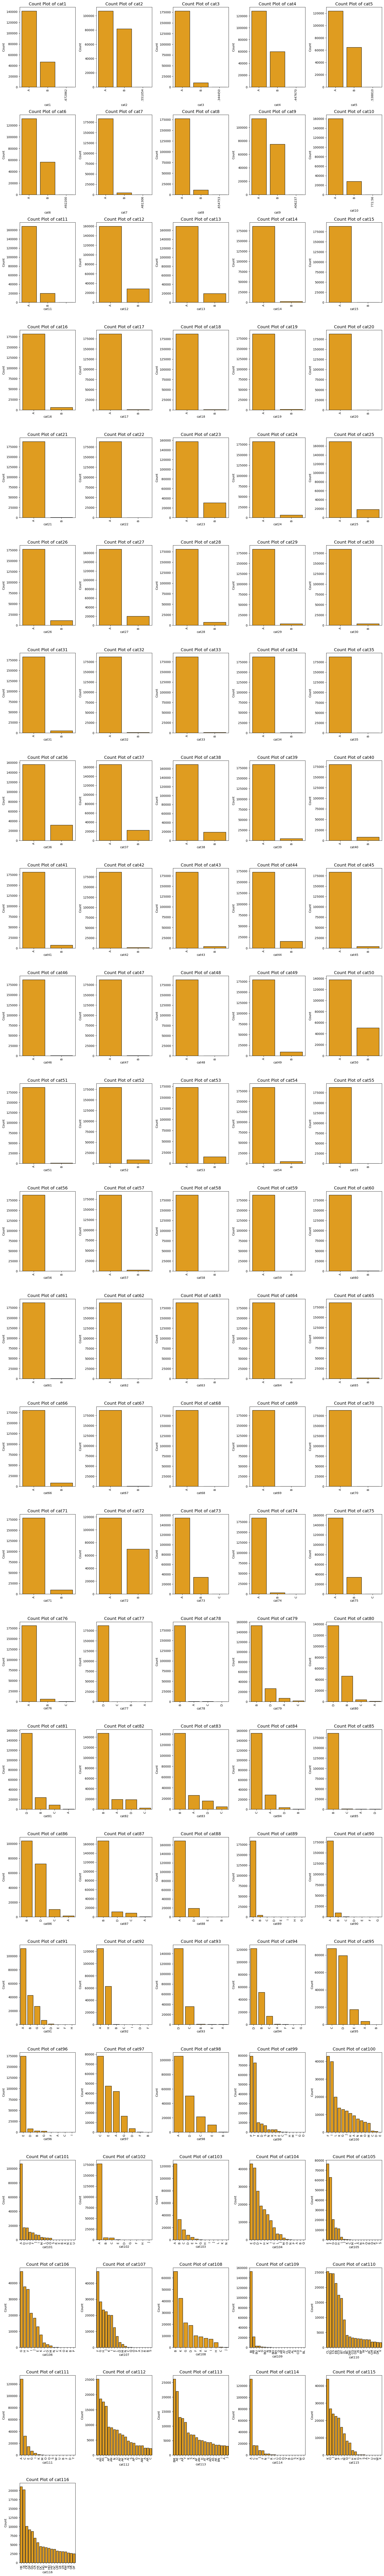

In [118]:
n_cols = 5
n_rows = math.ceil(len(cat_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for ax, col in zip(axes, cat_cols):

    top_categories = (
        df[col]
        .value_counts(dropna=True)
        .nlargest(20)
        .index
    )

    plot_data = df[col].where(df[col].isin(top_categories))

    sns.countplot(
        x=plot_data,
        ax=ax,
        order=plot_data.value_counts().index,
        color="orange",
        edgecolor="black"
    )

    ax.set_title(f"Count Plot of {col}", fontsize=14)
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.tick_params(axis="x", rotation=90)

# Remove unused subplots
for ax in axes[len(cat_cols):]:
    ax.remove()

plt.tight_layout()
plt.show()

### **<span style="color:orange;">1.2 Pie Chart of Categorical Features</span>**

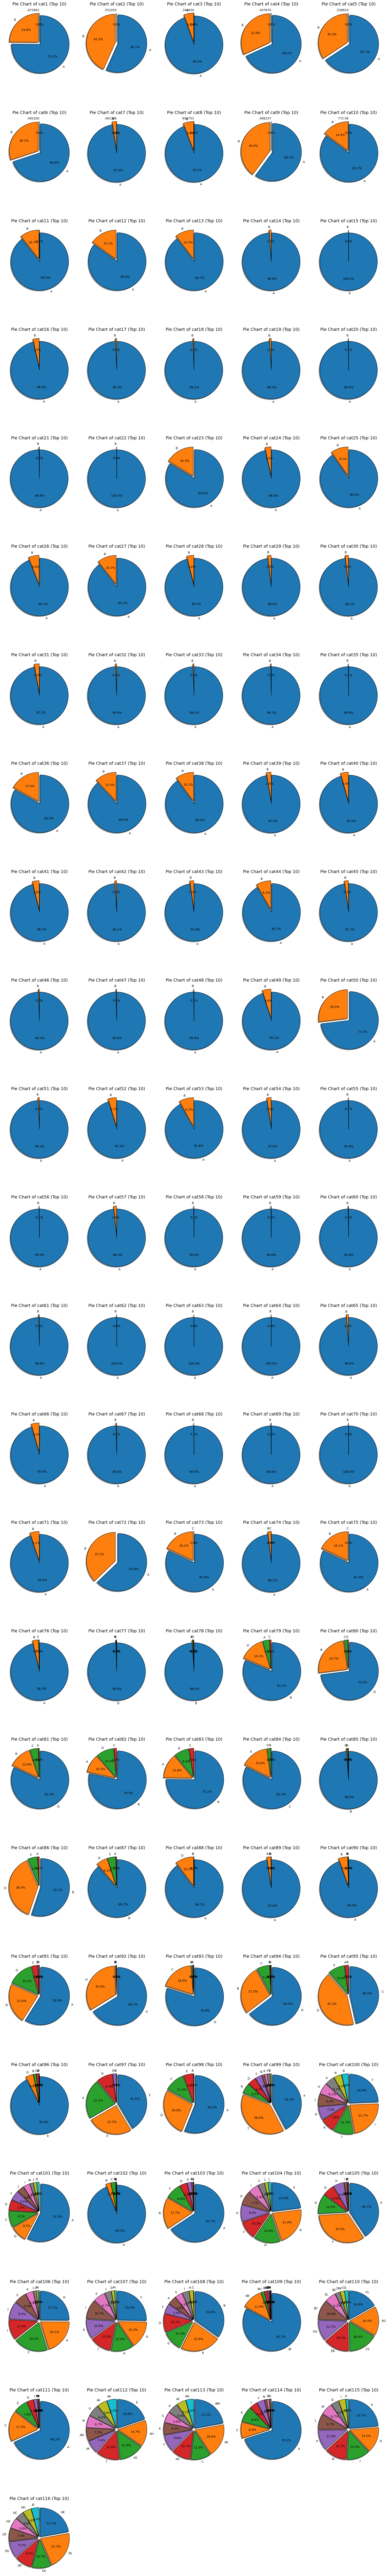

In [119]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for ax, col in zip(axes, cat_cols):

    value_counts = (
        df[col]
        .value_counts(dropna=True)
        .nlargest(10)
    )

    # explode all slices slightly
    explode = [0.05] * len(value_counts)

    ax.pie(
        value_counts.values,
        labels=value_counts.index,
        autopct="%1.1f%%",
        startangle=90,
        counterclock=False,
        explode=explode,
        shadow=True,
        wedgeprops=dict(
            edgecolor="black",
            linewidth=1
        )
    )

    ax.set_title(f"Pie Chart of {col} (Top 10)", fontsize=14)

# Remove unused subplots
for ax in axes[len(cat_cols):]:
    ax.remove()

plt.tight_layout()
plt.show()

### **<span style="color:orange;">1.3 Word Cloud of High Cardinal Categorical Features</span>**

In [120]:
n = 0
high_cardinality_cat_features = []
for col in cat_cols:
    if df[col].nunique() > 20:
        high_cardinality_cat_features.append(col)
        n +=1
print(f'There are {n} Categorical Features which high Cardinality.')

There are 6 Categorical Features which high Cardinality.


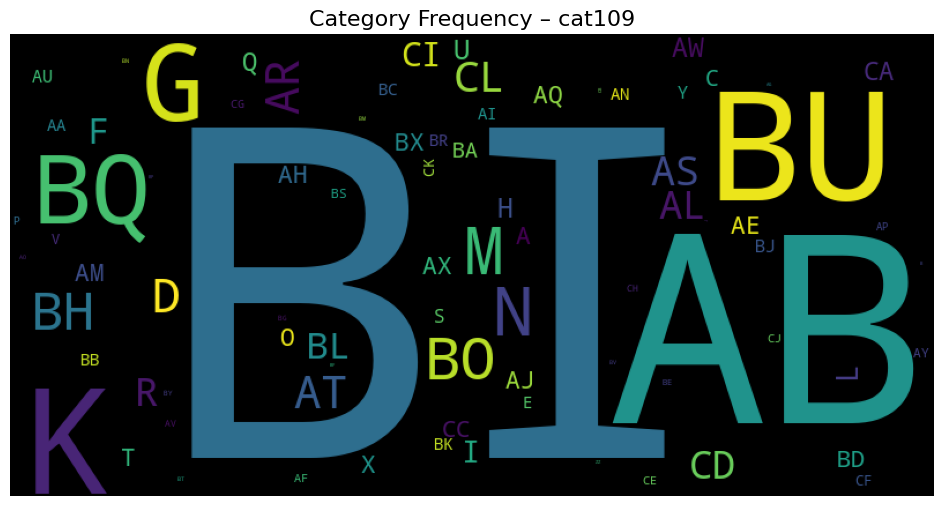

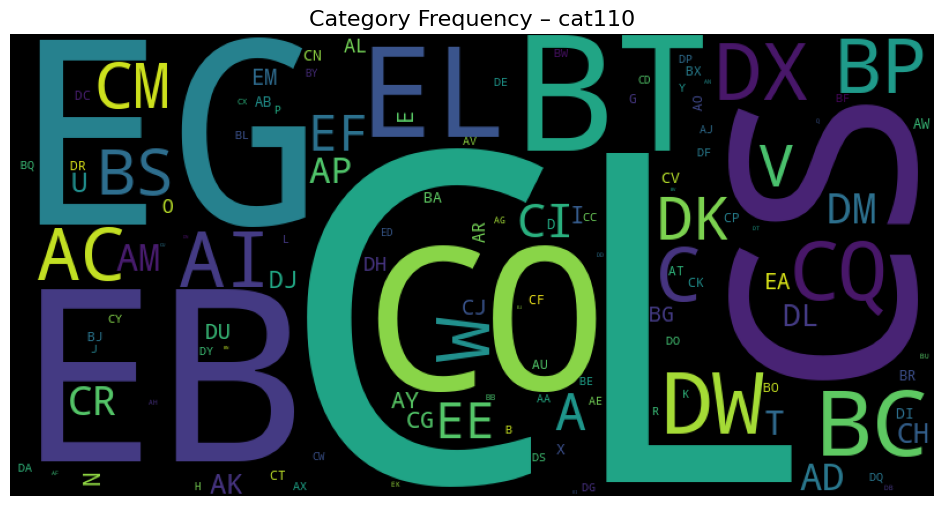

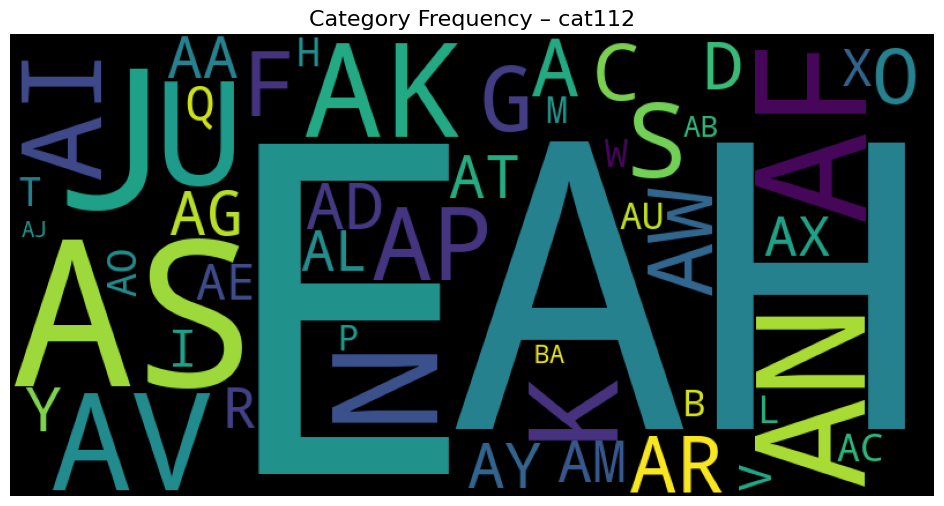

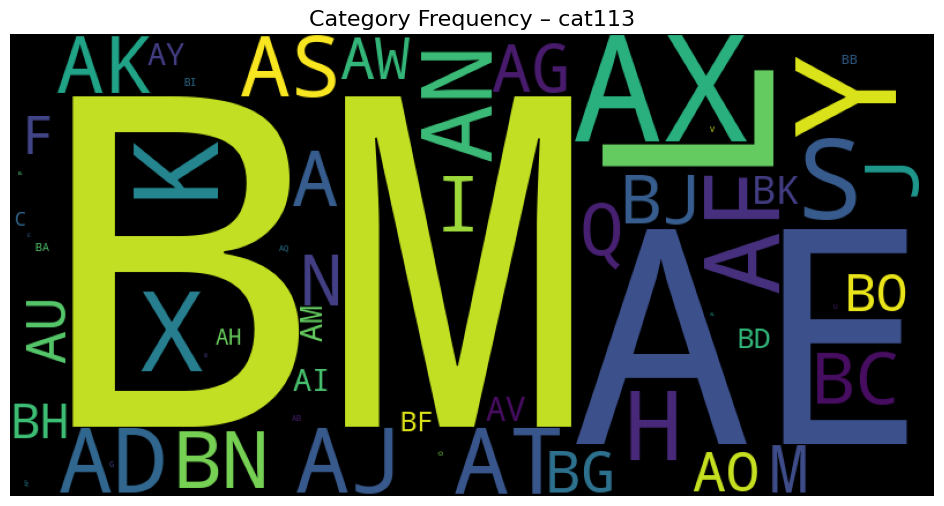

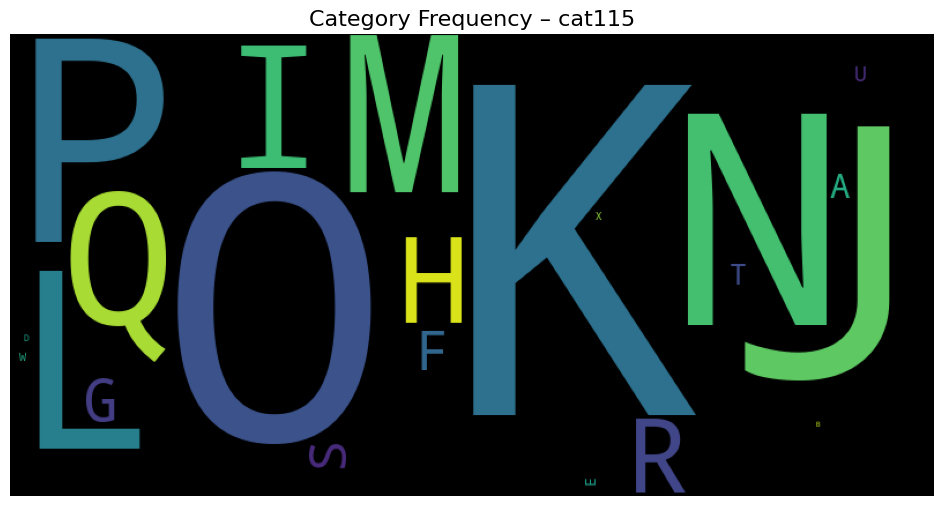

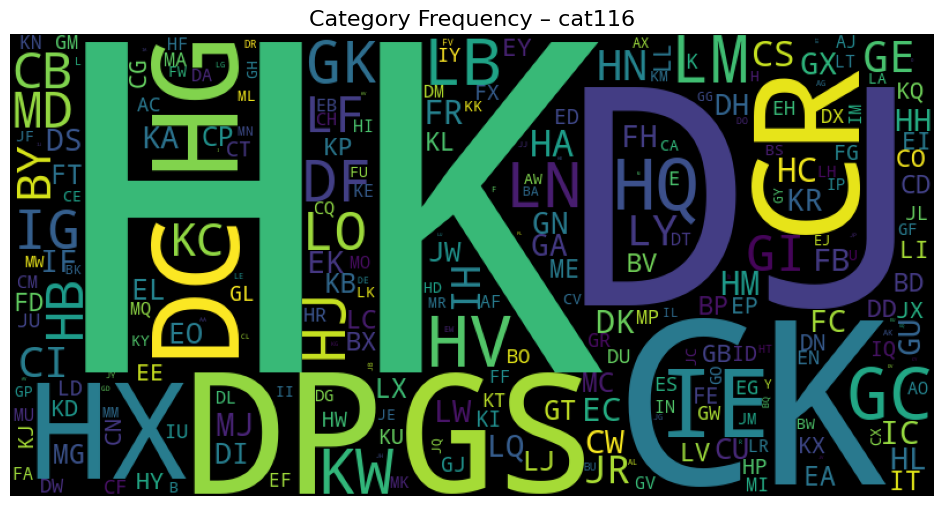

In [121]:
for col in high_cardinality_cat_features:
    freqs = (
        df[col]
        .dropna()
        .astype(str)
        .value_counts()
        .to_dict()
    )

    wc = WordCloud(
        width=800,
        height=400,
        background_color='black',
        max_words=-1
    ).generate_from_frequencies(freqs)

    plt.figure(figsize=(12, 6))
    plt.imshow(wc)
    plt.axis('off')
    plt.title(f"Category Frequency – {col}", fontsize=16)
    plt.show()

### **<span style="color:orange;">1.4 Histogram Plot of Numerical Features</span>**

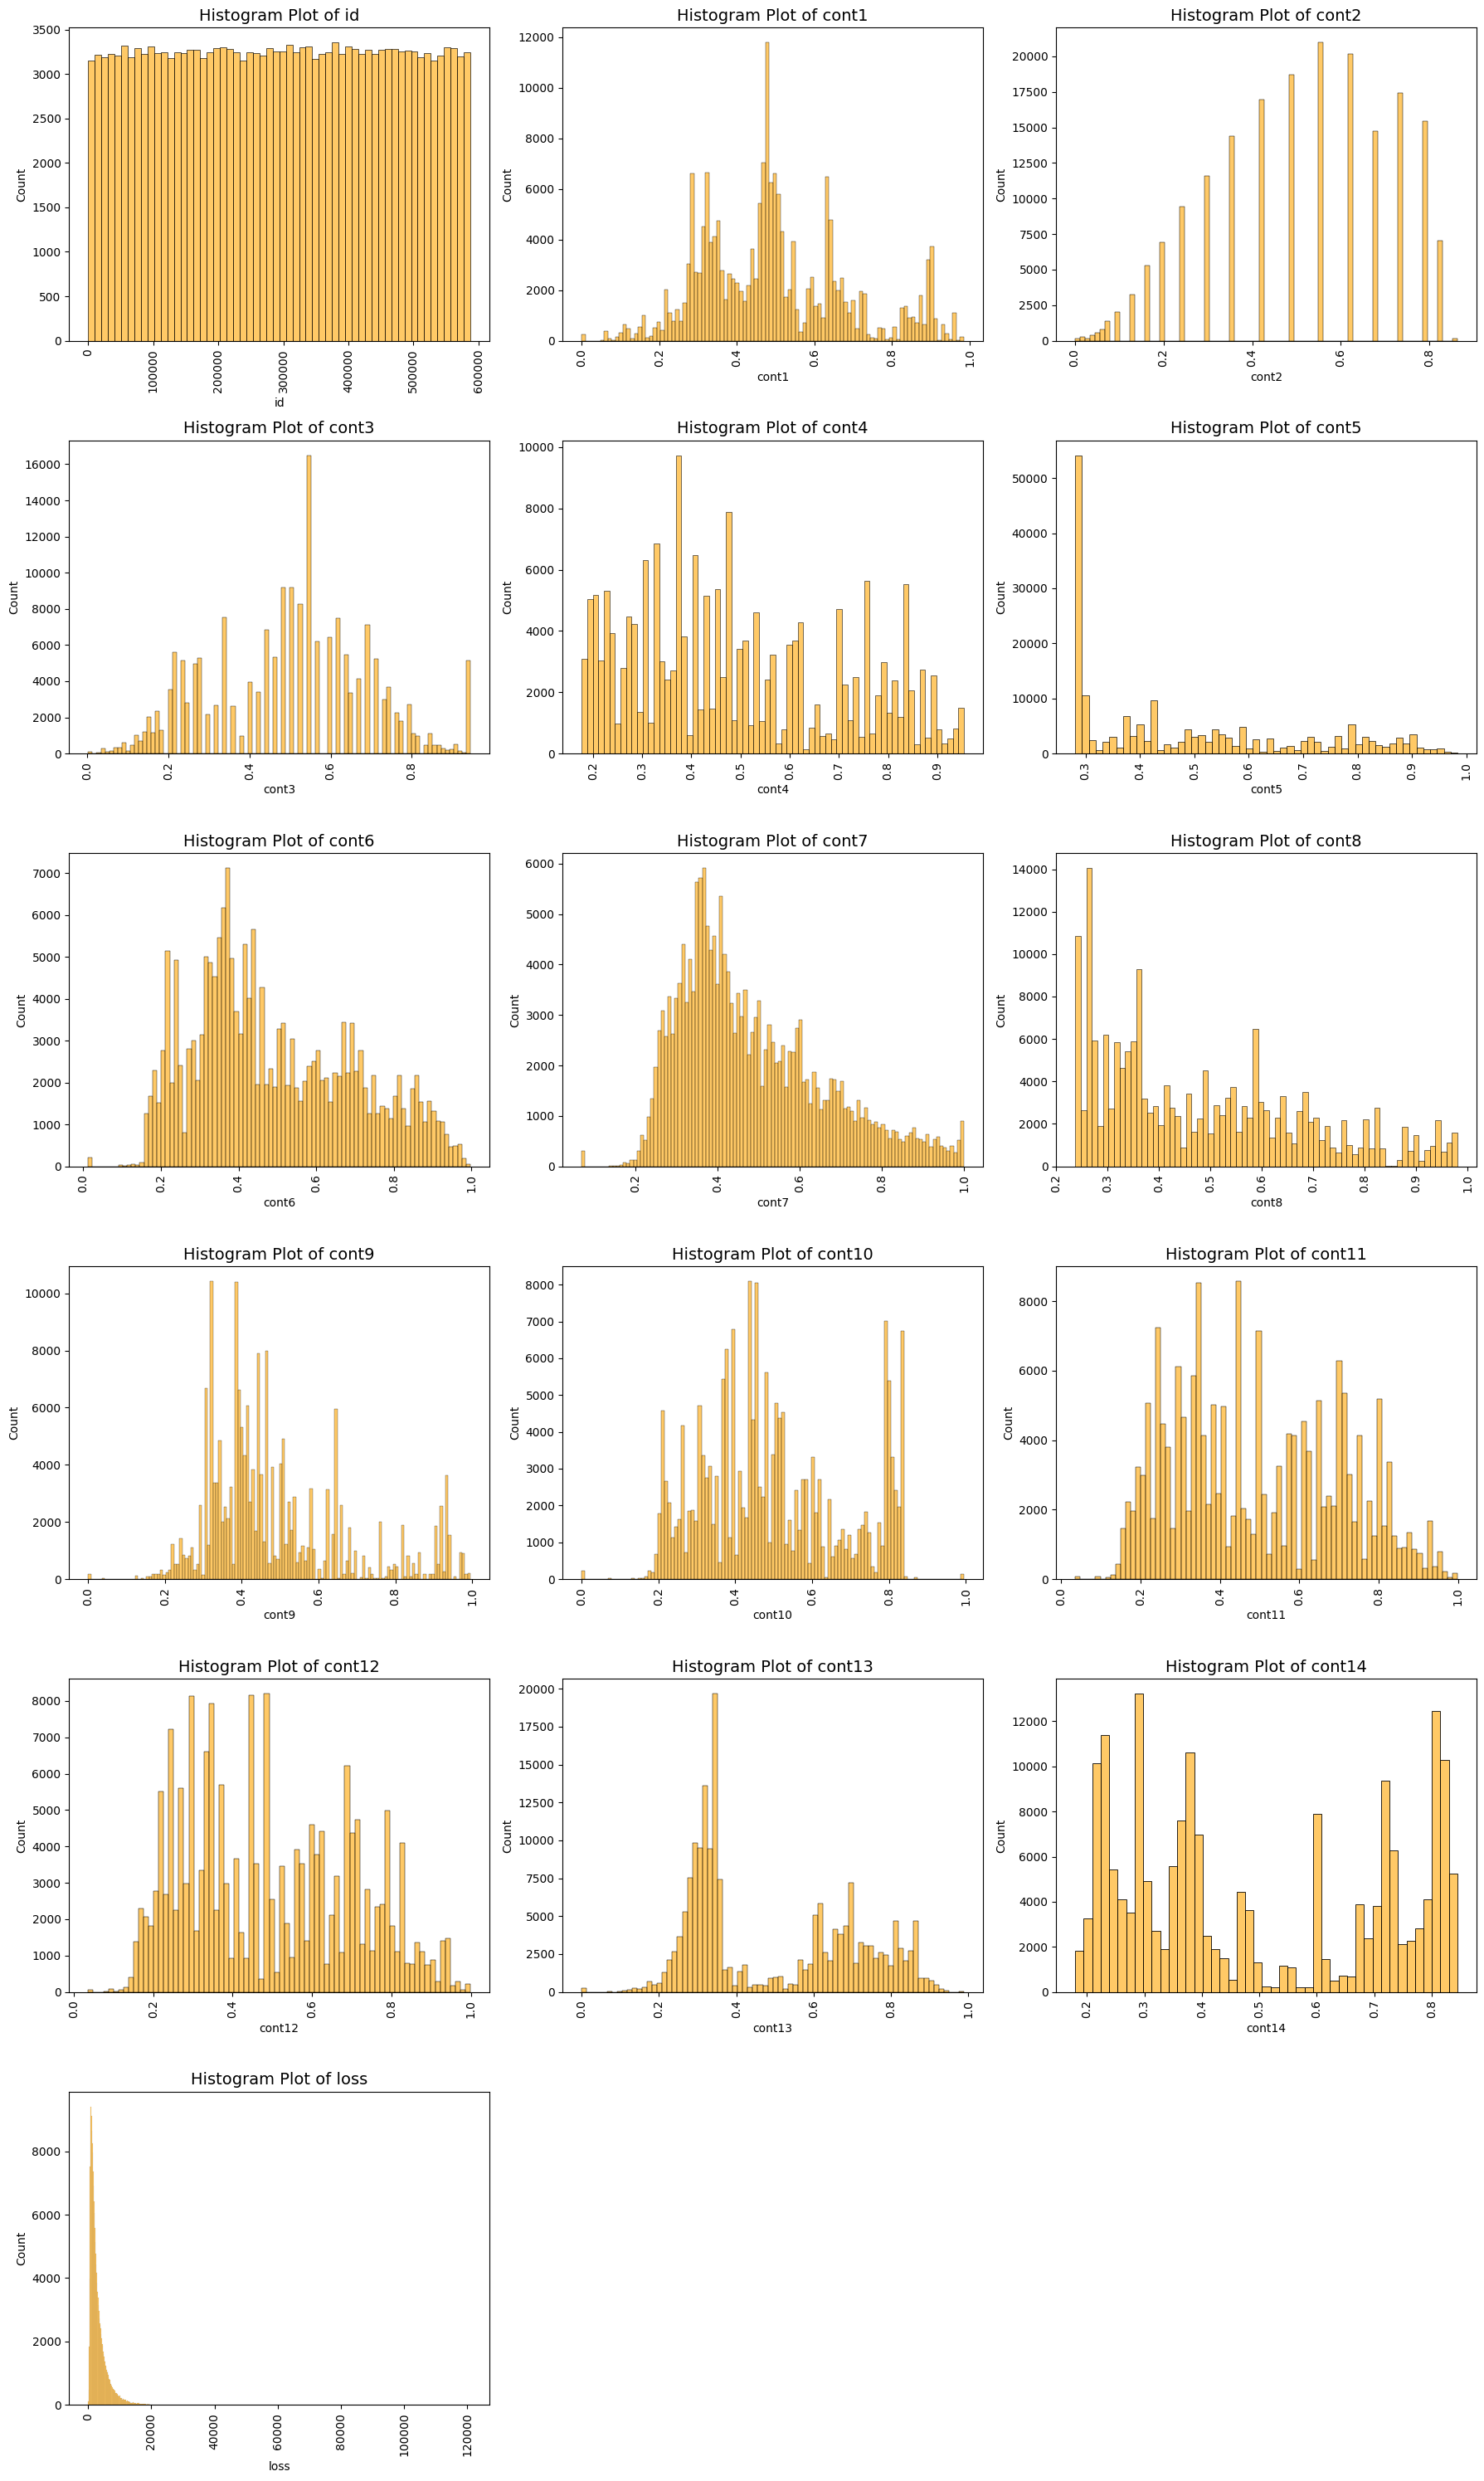

In [122]:
n_cols = 3
n_rows = math.ceil(len(num_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for ax, col in zip(axes, num_cols):
    sns.histplot(
        data=df,
        x=col,
        color="orange",
        edgecolor="black",
        alpha=0.6,
        ax=ax
    )
    ax.set_title(f"Histogram Plot of {col}", fontsize=14)
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.tick_params(axis="x", rotation=90)

# Remove unused subplots
for ax in axes[len(num_cols):]:
    ax.remove()

plt.tight_layout()
plt.show()

### **<span style="color:orange;">1.5 Boxplot of Numerical Features</span>**

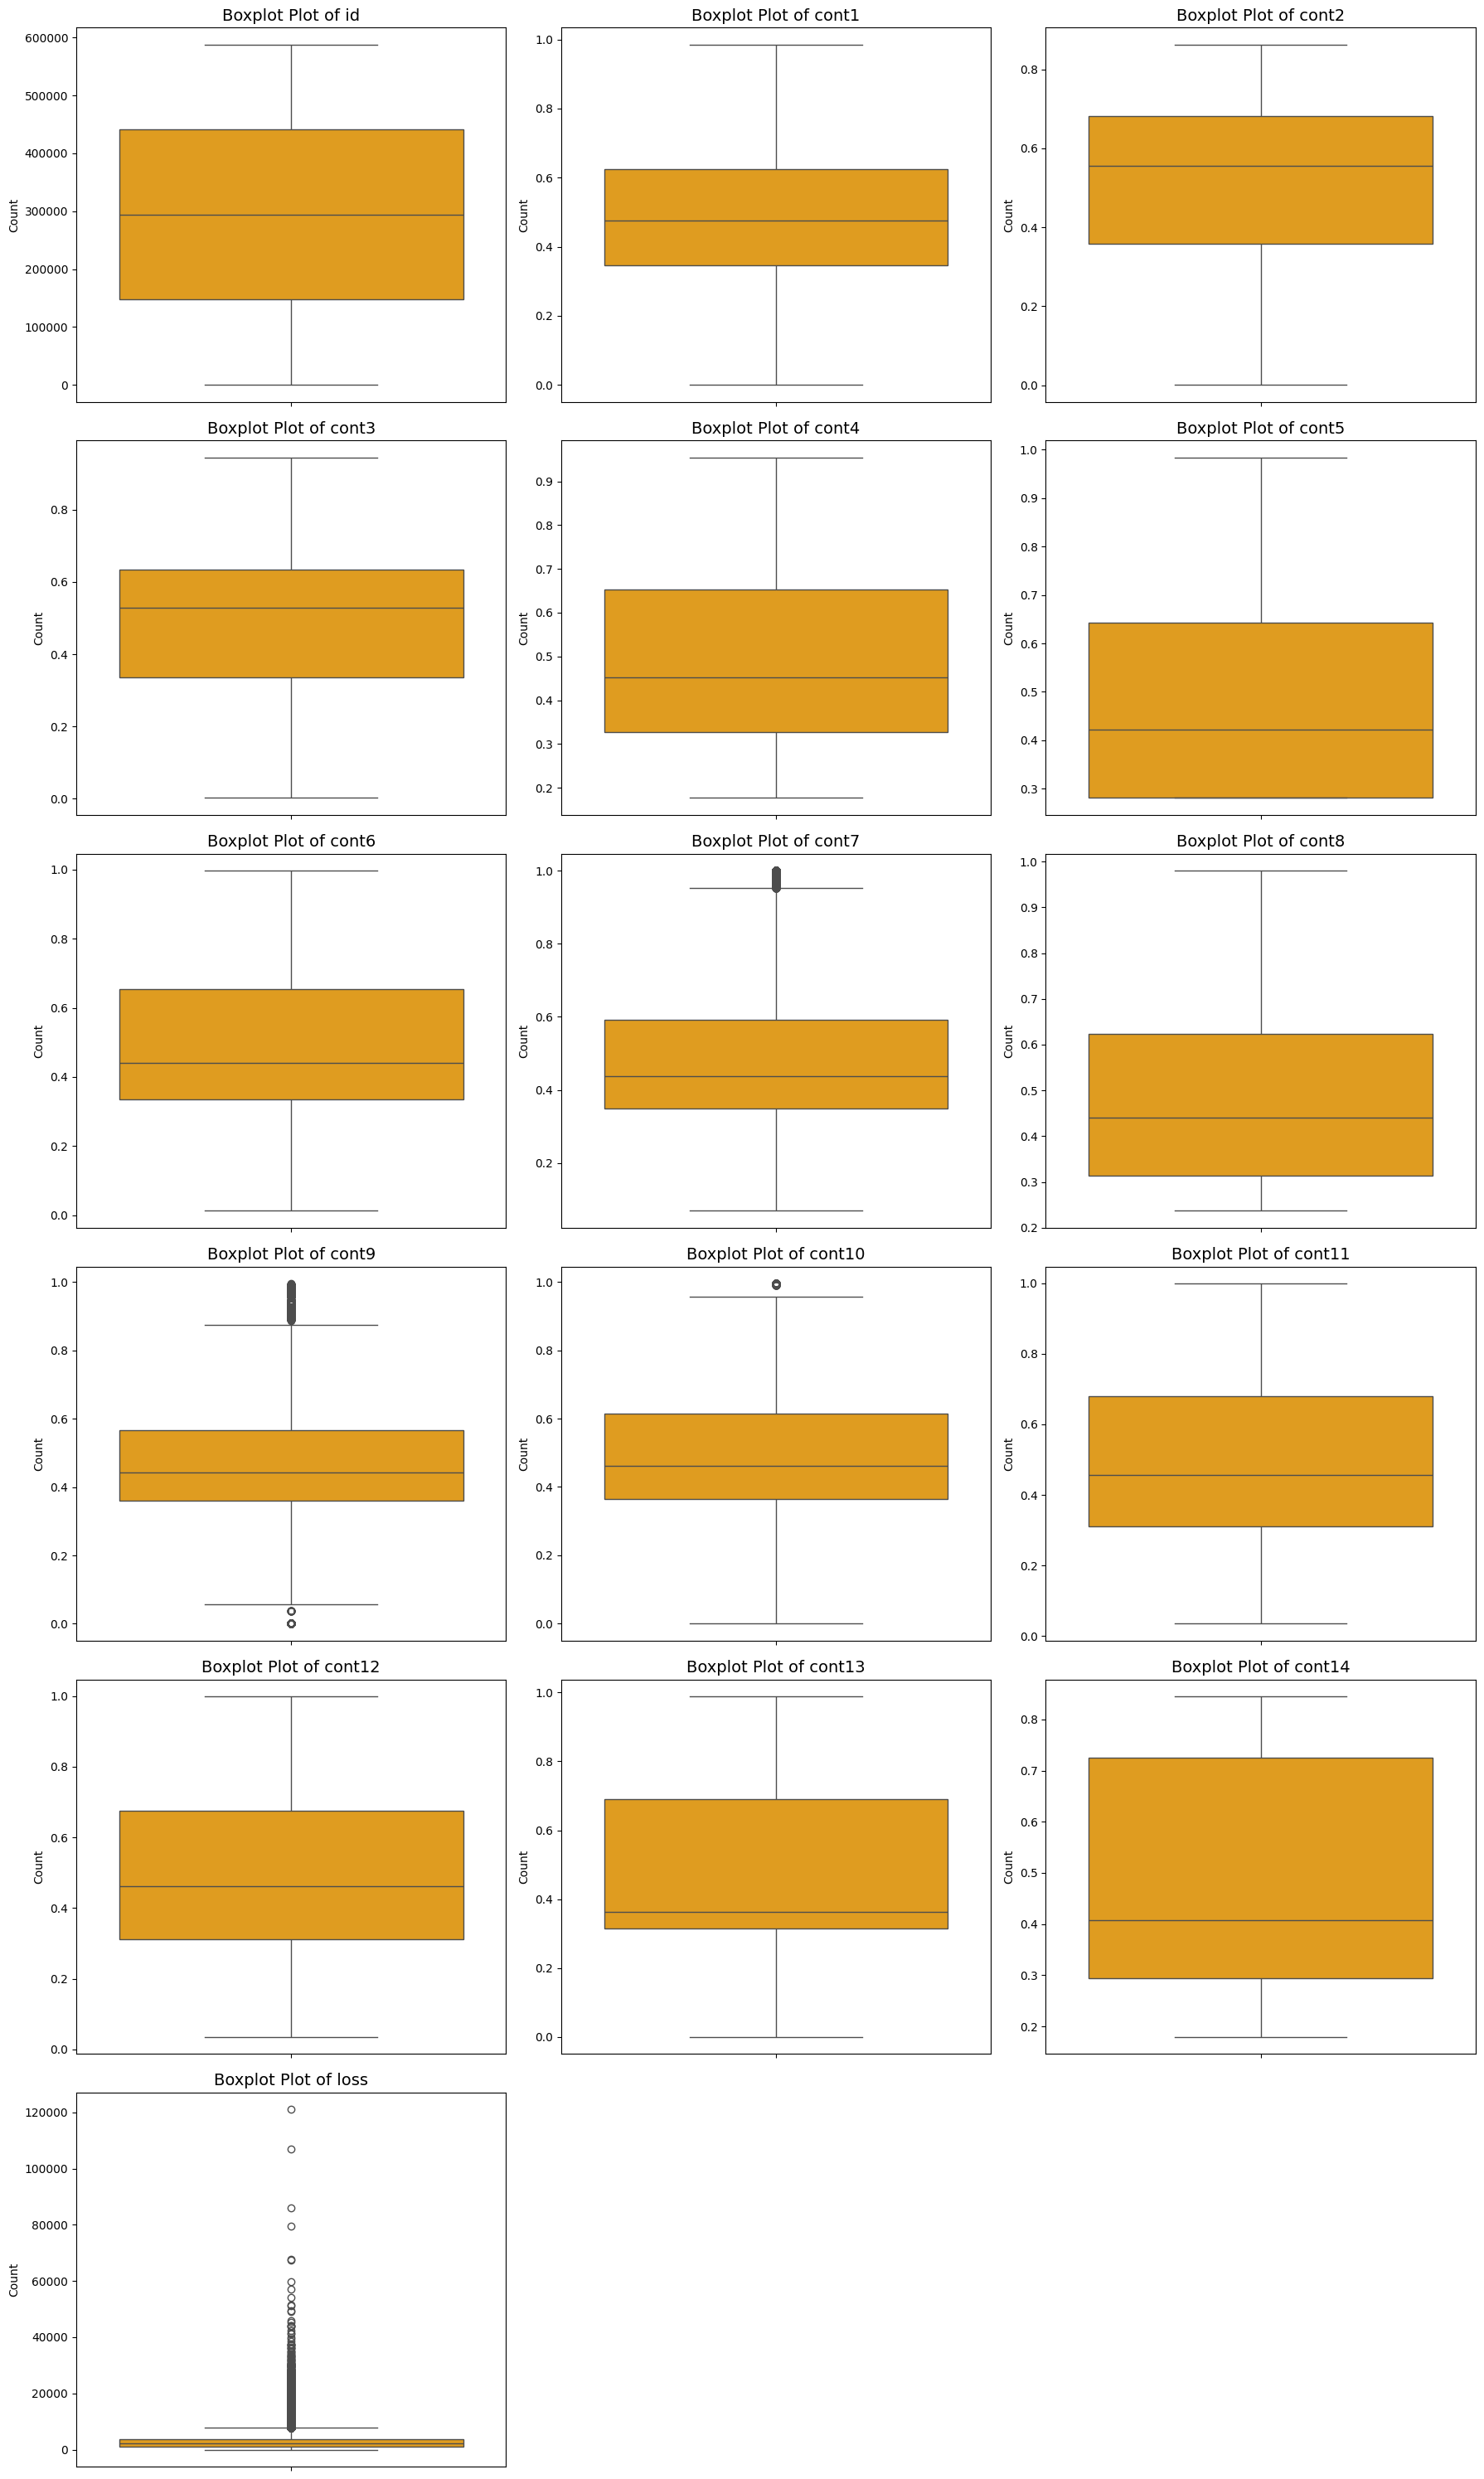

In [123]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for ax, col in zip(axes, num_cols):
    sns.boxplot(
        data=df,
        y=col,
        color="orange",
        ax=ax,
    )
    ax.set_title(f"Boxplot Plot of {col}", fontsize=14)
    ax.set_ylabel("Count")
    ax.tick_params(axis="x", rotation=90)

# Remove unused subplots
for ax in axes[len(num_cols):]:
    ax.remove()

plt.tight_layout()
plt.show()

### **<span style="color:orange;">1.6 Quantile-Quantile Plot of Numerical Features</span>**

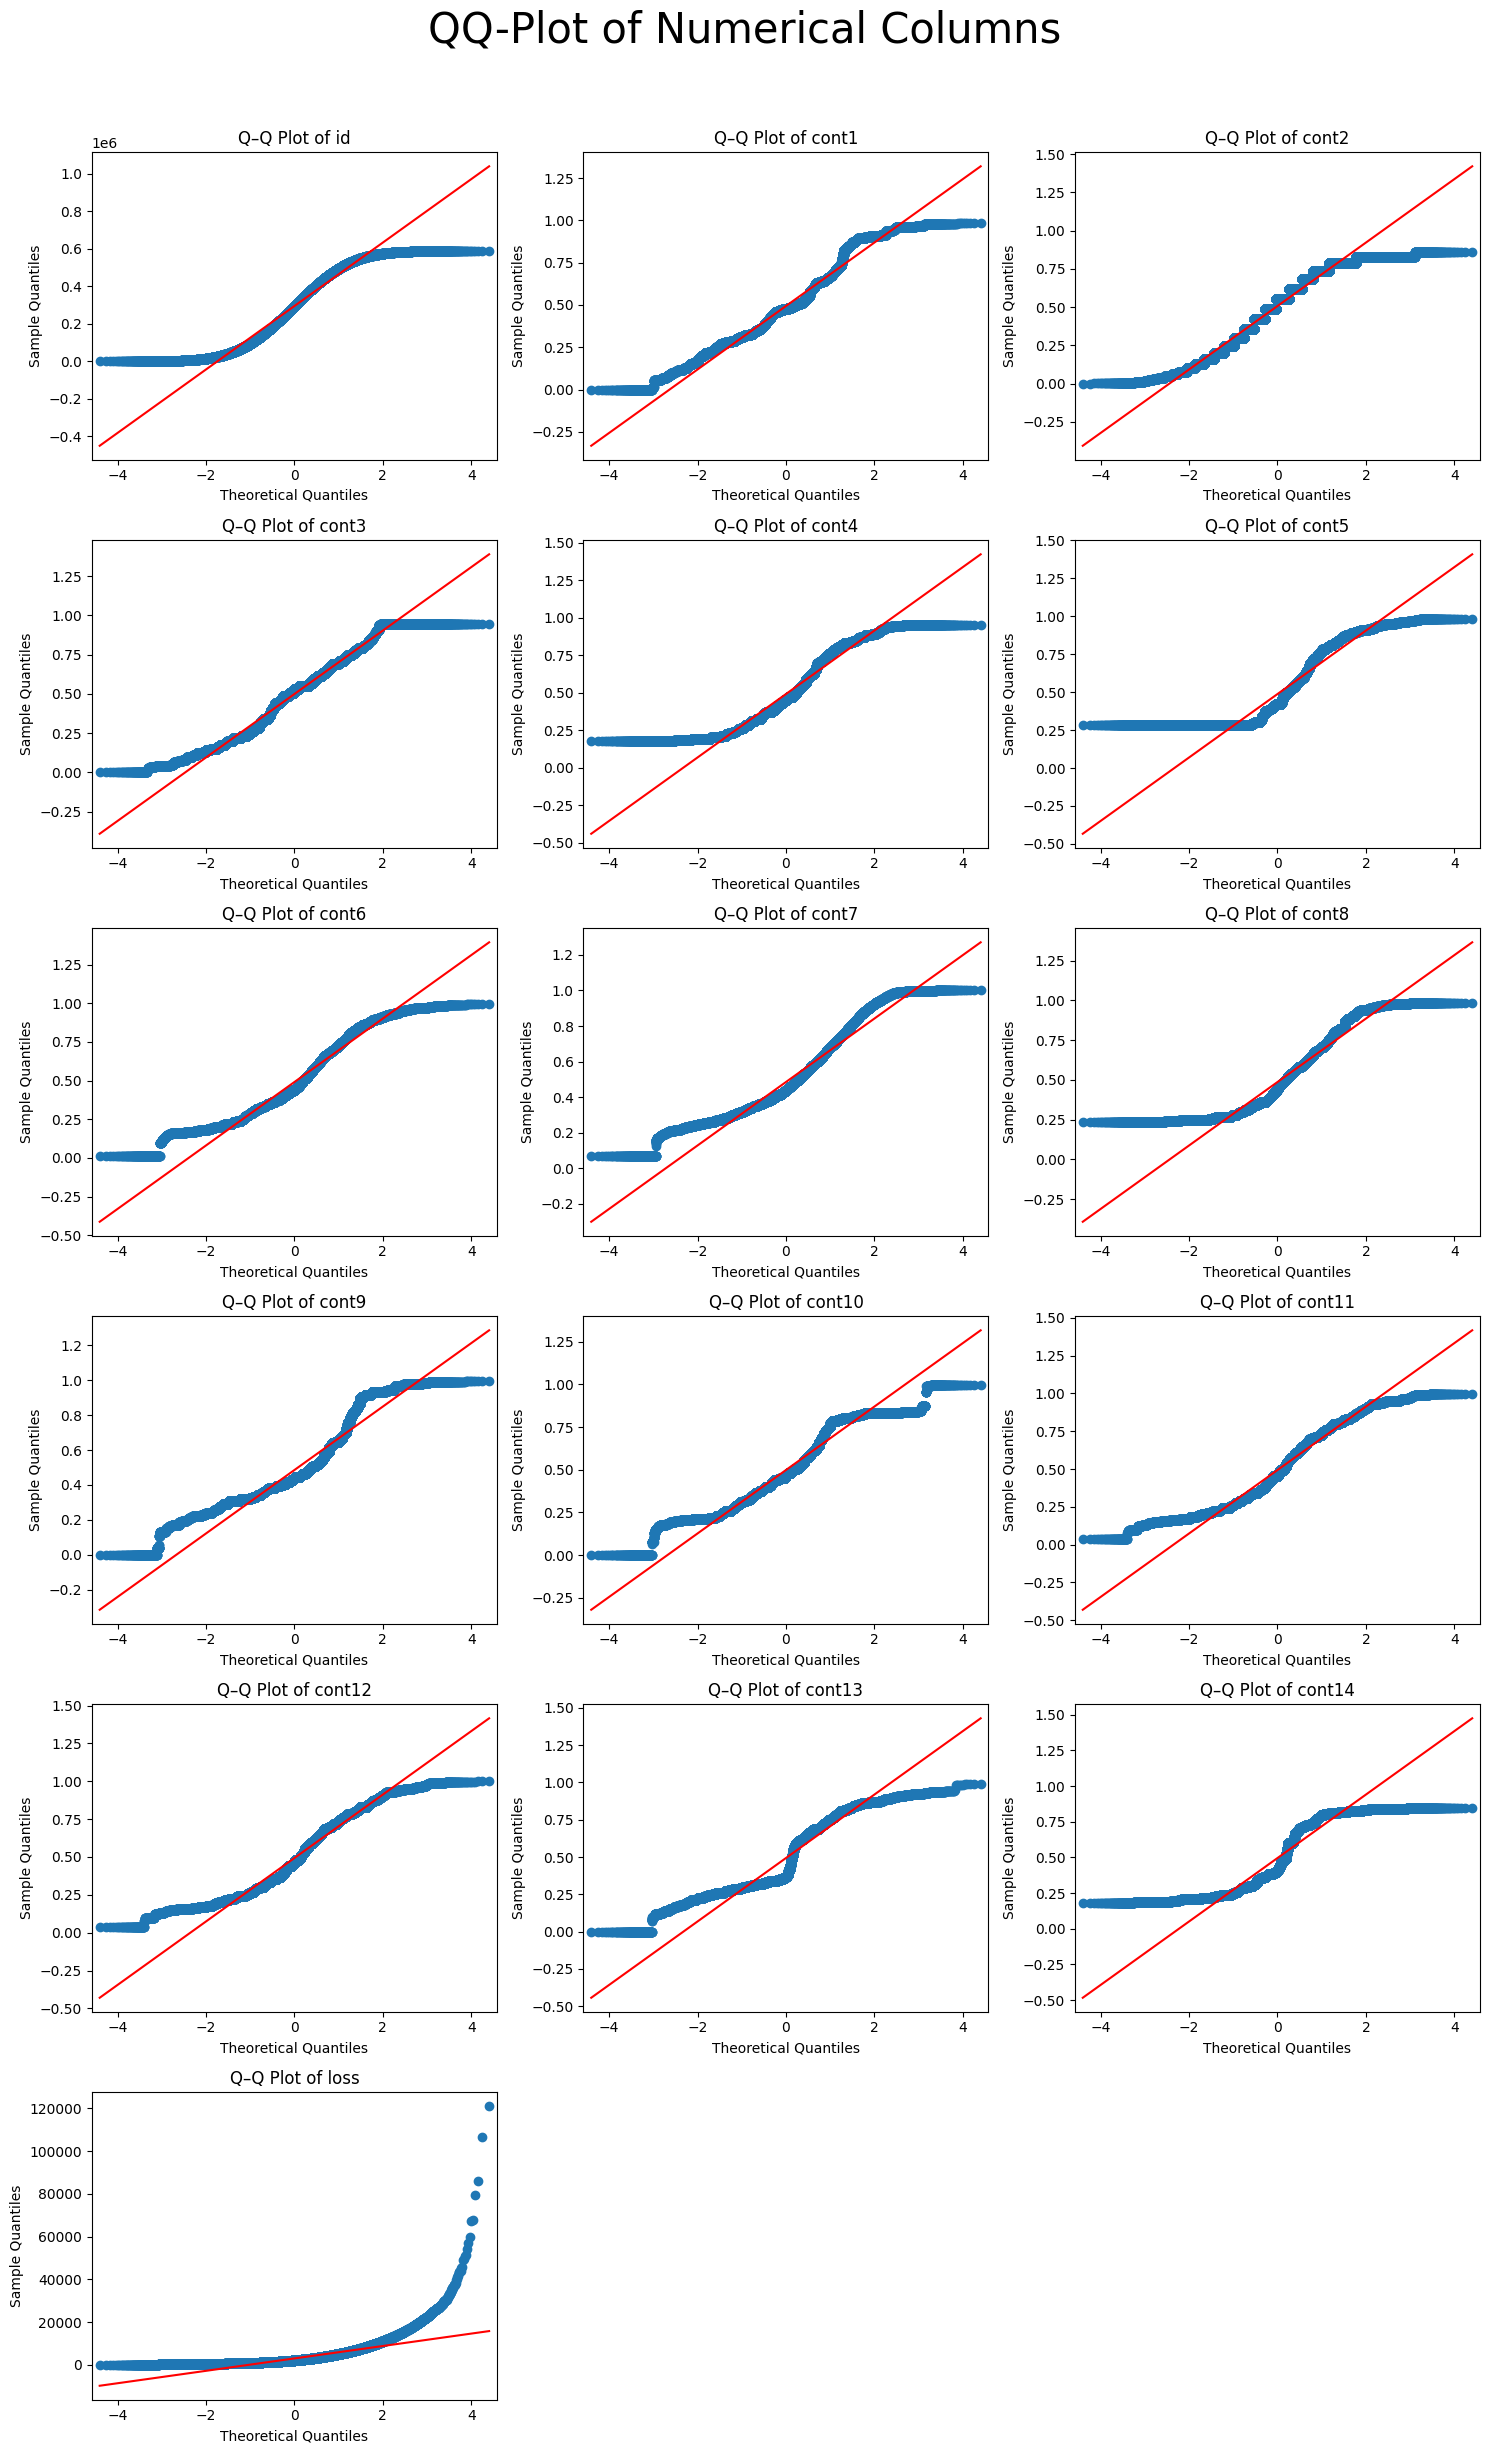

In [124]:
# Q-Q plots of numerical columns
n_cols = 3
n_rows = math.ceil(len(num_cols) / n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sm.qqplot(df[col].dropna(), line='s', ax=plt.gca())  # line='s' adds a reference line
    plt.title(f"Q–Q Plot of {col}")

plt.suptitle("QQ-Plot of Numerical Columns", fontsize=30, y=1.02)
plt.tight_layout()
plt.show()

### **<span style="color:orange;">1.7 Statistical Analysis for Numerical Features</span>**

#### **<span style="color:orange;">1.7.1 Skewness and Kurtosis</span>**

In [125]:
# Let's check for skewness
skewness = [df[col].skew() for col in num_cols]
kurtosis = [df[col].kurtosis() for col in num_cols]
skew_df = pd.DataFrame({
    "feature": num_cols,
    "skewness": skewness,
    "Kurtosis": kurtosis
})
skew_df

feature  skewness   Kurtosis
0       id -0.002155  -1.197359
1    cont1  0.516424  -0.101712
2    cont2 -0.310941  -0.895657
3    cont3 -0.010002  -0.606562
4    cont4  0.416096  -0.965424
5    cont5  0.681622  -0.876877
6    cont6  0.461214  -0.760544
7    cont7  0.826053   0.050145
8    cont8  0.676634  -0.542127
9    cont9  1.072429   0.563925
10  cont10  0.355001  -0.851664
11  cont11  0.280821  -1.050055
12  cont12  0.291992  -1.028374
13  cont13  0.380742  -1.349334
14  cont14  0.248674  -1.530071
15    loss  3.794958  48.079568

📌 Distributional Characteristics of Continuous Features

An analysis of skewness and kurtosis across the continuous features reveals notable variation in their distributional properties.

Most continuous variables (cont1–cont14) exhibit low to moderate skewness, with values generally ranging between −0.31 and 1.07. This indicates that the majority of features are approximately symmetric to mildly right-skewed, with no extreme asymmetry. Features such as cont7, cont8, and cont9 show comparatively higher positive skewness, suggesting longer right tails relative to other variables.

In terms of kurtosis, nearly all continuous features display negative kurtosis values, indicating platykurtic distributions. This suggests that these variables are flatter than a normal distribution, with lighter tails and fewer extreme values. The consistency of negative kurtosis across most features highlights a general lack of heavy-tailed behavior in the majority of predictors.

The id feature shows near-zero skewness and moderately negative kurtosis, reflecting a uniform-like distribution, which is typical for identifier variables.

In contrast, the loss variable stands out significantly from the rest of the features. It exhibits extreme positive skewness (3.79) and very high kurtosis (48.08), indicating a highly right-skewed and heavy-tailed distribution. This suggests that while most loss values are relatively small, a small number of observations take on very large values, contributing disproportionately to the overall distribution shape.

Overall, the distributional analysis shows that while most continuous features are well-behaved and moderately distributed, the target variable displays strong non-normality, characterized by substantial skewness and extreme tail behavior.

#### **<span style="color:orange;">1.7.2 Outliers Analysis</span>**

In [126]:
def iqr_outlier_counts(series, k=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr_val = iqr(series, nan_policy="omit")

    lower = q1 - k * iqr_val
    upper = q3 + k * iqr_val

    below = (series < lower).sum()
    above = (series > upper).sum()

    return below, above


In [127]:
outlier_rows = []

for col in num_cols:
    below, above = iqr_outlier_counts(df[col])
    outlier_rows.append({
        "feature": col,
        "below_count": below,
        "above_count": above,
        "total_outliers": below + above
    })

outlier_df = pd.DataFrame(outlier_rows)
outlier_df

feature  below_count  above_count  total_outliers
0       id            0            0               0
1    cont1            0            0               0
2    cont2            0            0               0
3    cont3            0            0               0
4    cont4            0            0               0
5    cont5            0            0               0
6    cont6            0            0               0
7    cont7            0         2659            2659
8    cont8            0            0               0
9    cont9          206        12988           13194
10  cont10            0          140             140
11  cont11            0            0               0
12  cont12            0            0               0
13  cont13            0            0               0
14  cont14            0            0               0
15    loss            0        11554           11554

In [128]:
def iqr_bounds(series, k=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr_val = iqr(series, nan_policy="omit")
    return q1 - k * iqr_val, q3 + k * iqr_val

In [129]:
# Feature: loss
df.loc[(df.loss < iqr_bounds(df.loss)[0]) | (df.loss > iqr_bounds(df.loss)[1])][num_cols].head(10)

id     cont1     cont2     cont3     cont4     cont5     cont6  \
8     23.0  0.330514  0.555782  0.440642  0.473202  0.281143  0.628534   
28    90.0  0.645422  0.299102  0.527991  0.327354  0.422268  0.671307   
37   125.0  0.227585  0.555782  0.844219  0.432728  0.281143  0.463958   
45   156.0  0.914335  0.737068  0.317666  0.802892  0.635304  0.894682   
65   222.0  0.372785  0.785784  0.944251  0.383428  0.281143  0.458113   
67   225.0  0.676593  0.785784  0.201309  0.503820  0.674529  0.489770   
69   228.0  0.558141  0.827585  0.692825  0.327354  0.871010  0.360659   
78   276.0  0.475784  0.785784  0.592681  0.614134  0.783230  0.373500   
97   335.0  0.425579  0.620805  0.673861  0.809278  0.525831  0.665573   
119  435.0  0.325401  0.827585  0.777587  0.222469  0.456483  0.227020   

        cont7    cont8    cont9   cont10    cont11    cont12    cont13  \
8    0.384099  0.61229  0.38249  0.51111  0.682315  0.669033  0.756454   
28   0.464924  0.33906  0.62542  0.66076  0.607500  0.594646  0.678452   
37   0.745362  0.68308  0.34365  0.43919  0.812519  0.800726  0.199940   
45   0.671992  0.80438  0.93884  0.80218  0.821840  0.832658  0.854872   
65   0.862654  0.73247  0.43111  0.36974  0.843548  0.832658  0.236253   
67   0.478205  0.48864  0.76280  0.42828  0.480509  0.469884  0.654753   
69   0.418469  0.26847  0.46226  0.50556  0.715131  0.701926  0.345247   
78   0.381883  0.36083  0.44352  0.45017  0.338312  0.366307  0.339244   
97   0.536976  0.92176  0.48320  0.67065  0.695685  0.682413  0.633362   
119  0.310578  0.25461  0.38249  0.35434  0.260140  0.264760  0.298734   

       cont14      loss  
8    0.361191  10280.20  
28   0.285224  11673.03  
37   0.836949  11248.08  
45   0.338507  10104.79  
65   0.236756  11706.75  
67   0.837951  17355.29  
69   0.241049   8537.33  
78   0.211291  15495.88  
97   0.604892   8581.98  
119  0.798065  11265.34

In [130]:
# Feature: cont9
df.loc[(df.cont9 < iqr_bounds(df.cont9)[0]) | (df.cont9 > iqr_bounds(df.cont9)[1])][num_cols].head(10)

id     cont1     cont2     cont3     cont4     cont5     cont6  \
14    47.0  0.894333  0.299102  0.094942  0.722125  0.281143  0.894903   
33   111.0  0.894333  0.299102  0.280933  0.713852  0.281143  0.731498   
42   146.0  0.853789  0.555782  0.317666  0.309621  0.863000  0.547545   
45   156.0  0.914335  0.737068  0.317666  0.802892  0.635304  0.894682   
62   212.0  0.883459  0.358319  0.201309  0.614134  0.473767  0.750452   
76   259.0  0.936238  0.299102  0.215772  0.284048  0.281143  0.892895   
135  488.0  0.914335  0.681761  0.397983  0.614134  0.635304  0.846712   
186  644.0  0.901249  0.827585  0.506105  0.838840  0.718531  0.853750   
205  711.0  0.905798  0.555782  0.336963  0.696873  0.281143  0.844563   
207  716.0  0.873560  0.488789  0.230975  0.463029  0.281143  0.802329   

        cont7    cont8    cont9   cont10    cont11    cont12    cont13  \
14   0.586433  0.80058  0.93383  0.78770  0.880469  0.871011  0.822493   
33   0.438285  0.75964  0.93383  0.78770  0.711942  0.714544  0.751507   
42   0.431372  0.73247  0.91898  0.60932  0.592525  0.579845  0.723122   
45   0.671992  0.80438  0.93884  0.80218  0.821840  0.832658  0.854872   
62   0.533170  0.46477  0.90483  0.82249  0.550529  0.590961  0.842905   
76   0.600719  0.88205  0.96909  0.82889  0.797841  0.832658  0.824432   
135  0.579907  0.80058  0.93884  0.80218  0.776962  0.764426  0.820538   
186  0.614438  0.83275  0.91644  0.81923  0.909611  0.935432  0.846403   
205  0.517666  0.97123  0.93383  0.83510  0.832976  0.832658  0.810511   
207  0.512858  0.67263  0.91183  0.79863  0.810130  0.798279  0.835712   

       cont14      loss  
14   0.251278    585.18  
33   0.673856   1831.24  
42   0.810941   2809.74  
45   0.338507  10104.79  
62   0.255789    703.15  
76   0.360817   6213.76  
135  0.731263   1248.59  
186  0.629565   1221.25  
205  0.725450   1842.53  
207  0.793087   3007.77